In [1]:
import cv2
import glob
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
devices = tf.config.experimental.list_physical_devices('GPU')

try: 
    tf.config.experimental.set_memory_growth(devices[0], True)
except:
    print('No GPU detected')

In [3]:
validation_data_path = r'.\Pneumonia\val'
model_weigths_path = r'.\log_weights'

In [4]:
images_normal = glob.glob(validation_data_path + r'\NORMAL\*.*')
images_pneumonia = glob.glob(validation_data_path + r'\PNEUMONIA\*.*')

In [5]:
def preprocessData(ifiles, label):
    image_list = []
    label_list = []
    for file in tqdm.tqdm(ifiles):
        image = cv2.imread(file)
        image = cv2.resize(image, (120, 120))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image.astype('float32') / 255
        image_list.append(image)
        label_list.append(label)
    return image_list, label_list

In [6]:
images, labels = preprocessData(images_normal, 0)
images_, labels_ = preprocessData(images_pneumonia, 1)

images.extend(images_)
labels.extend(labels_)

100%|██████████| 308/308 [00:03<00:00, 87.61it/s] 


In [7]:
model_conv = tf.keras.models.load_model(model_weigths_path + r'\model_conv.h5')

results = []
for img in tqdm.tqdm(images):
    results.append(np.argmax(model_conv.predict(np.expand_dims(img, axis=0))))
    
results = np.array(results)
labels = np.array(labels)

100%|██████████| 616/616 [02:05<00:00,  4.90it/s] 


In [8]:
print(classification_report(results, labels))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       296
           1       0.94      0.91      0.93       320

    accuracy                           0.93       616
   macro avg       0.93      0.93      0.93       616
weighted avg       0.93      0.93      0.93       616



In [9]:
print(f'Accuracy score of Conv model: {accuracy_score(results, labels)}')

Accuracy score of Conv model: 0.9253246753246753


<AxesSubplot:title={'center':'Confusion matrix'}>

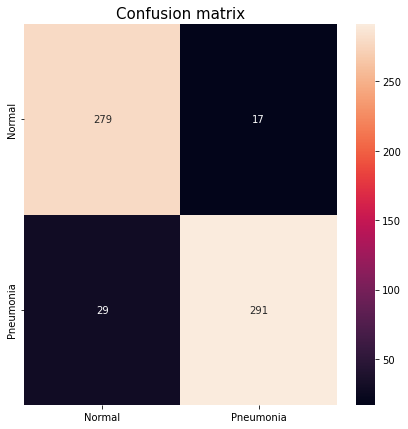

In [21]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_title('Confusion matrix', size=15)
sns.heatmap(confusion_matrix(results, labels), ax=ax, fmt='g', annot=True,
               xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])

<AxesSubplot:title={'center':'Training time'}, xlabel='Epochs', ylabel='Seconds'>

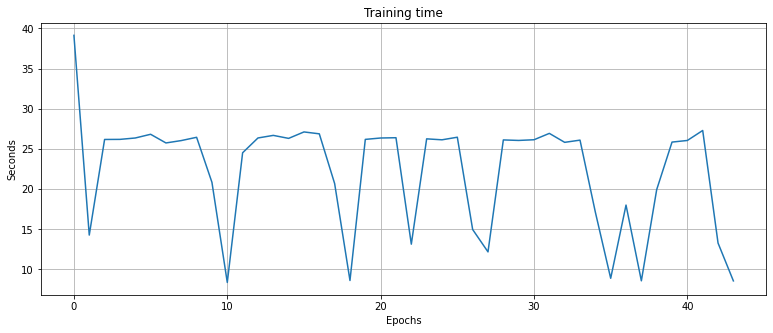

In [20]:
path_to_log_files = r'C:\Users\Athenda\Desktop\Python\KDNuggets 20\Pneumonia chest X_Ray'
log_duration = pd.read_csv(path_to_log_files + r'\log_duration\Conv_duration_log.csv')

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(111)
ax.set_title('Training time')
ax.set_ylabel('Seconds')
ax.set_xlabel('Epochs')
ax.grid(True)
sns.lineplot(x='epochs', y='duration', data=log_duration, ax=ax)

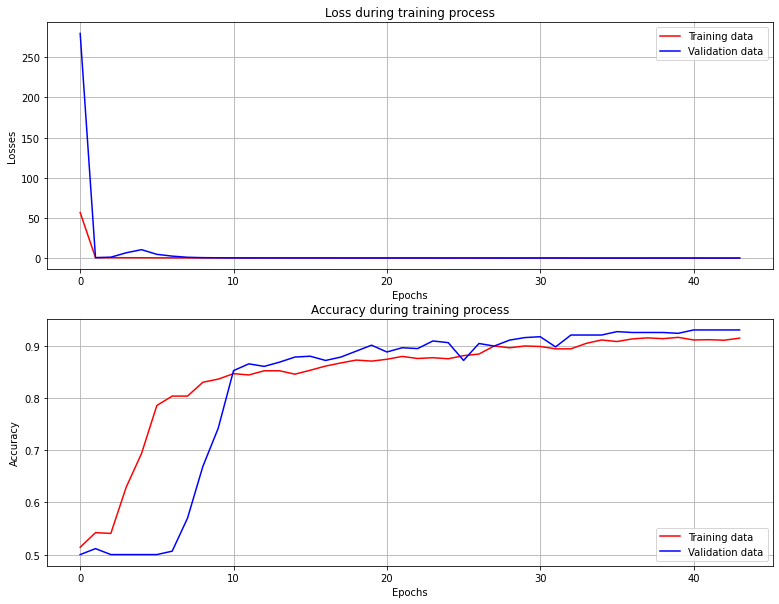

In [39]:
log_history = pd.read_csv(path_to_log_files + r'\log_history\history_conv.csv')

fig = plt.figure(figsize=(13, 10))

ax = fig.add_subplot(211)
ax.set_title('Loss during training process')
ax.set_xlabel('Epochs')
ax.set_ylabel('Losses')
ax.grid(True)
ax.plot(log_history['loss'], color='red')
ax.plot(log_history['val_loss'], color='blue')
ax.legend(loc='upper right', labels=['Training data', 'Validation data'])

ax_ = fig.add_subplot(212)
ax_.set_title('Accuracy during training process')
ax_.set_xlabel('Epochs')
ax_.set_ylabel('Accuracy')
ax_.grid(True)
ax_.plot(log_history['accuracy'], color='red')
ax_.plot(log_history['val_accuracy'], color='blue')
ax_.legend(loc='lower right', labels=['Training data', 'Validation data'])